# Линейная алгебра: сходство текстов и аппроксимация функций

## Материалы
Справка по функциям пакета scipy.linalg: http://docs.scipy.org/doc/scipy/reference/linalg.html

Справка по работе с файлами в Python: https://docs.python.org/2/tutorial/inputoutput.html#reading-and-writing-files

Справка по регулярным выражениям в Python (если вы захотите узнать про них чуть больше): https://docs.python.org/2/library/re.html

### Задача 1: сравнение предложений
Дан набор предложений, скопированных с Википедии. Каждое из них имеет "кошачью тему" в одном из трех смыслов:

1. кошки (животные)

2. UNIX-утилита cat для вывода содержимого файлов

3. версии операционной системы OS X, названные в честь семейства кошачьих

Ваша задача — найти два предложения, которые ближе всего по смыслу к расположенному в самой первой строке. В качестве меры близости по смыслу мы будем использовать косинусное расстояние.

#### Решение:

Импортируем необходимые библиотеки:

In [2]:
import re
import numpy as np
from scipy.spatial import distance

Считываем предложения из текстового файла:

In [21]:
handle = open('sentences.txt')
data = list()
text = list()
for string in handle: #для каждой строки из файла
    string = string.rstrip().lower() #удаляем перенос на новую строку в конце каждой строки и делаем все буквы строчными
    text.append(string)
    string = re.split('[^a-z]', string) #с помощью регулярных выражений разбиваем каждую строку на слова:
    #разделителем мы приняли равными все, что не является буквами
    data.append(string) #из полученных разбитых строк на слова делаем массив

Создаем единый массив со всеми словами из файла:

In [7]:
words = list()
for sentence in data:
    for word in sentence:
        if word != '':
            words.append(word)

Избавляемся от пропущенных значений через генератор массивов: 

In [9]:
final_data = list()
for sentence in data:
    sentence = [word for word in sentence if word != '']
    final_data.append(sentence)

Считаем, сколько раз каждое слово появлялось в файле:

In [10]:
indeces = dict()
for word in words:
    indeces[word] = indeces.get(word, 0) + 1

Составляем матрицу из нулей размером n * d, где n — число предложений в файле, d — число уникальных слов в файле:

In [11]:
sentences_count = len(final_data)
words_count = len(indeces)
matrix = np.zeros((sentences_count, words_count))

Заполняем матрицу количеством вхождений j-го слова в i-е предложение:

In [12]:
i = 0
for sentence in final_data: #считываем каждое предложение
    if i == 0: #первая строка
        j = 0 #обнуляем счетчик столбцов, чтобы начать с самого первого столбца
        for word in indeces: #для каждого слова из обшего набора слов текстового файла
            if j == 0: #первый столбец
                for word_in_sentence in sentence: #ищем слово-близнец среди слов предложения
                    if word == word_in_sentence:
                        matrix[i][j] += 1 #считаем, сколько раз это слово встречается в предложении
            else: #со второго столбца и дальше вправо
                for word_in_sentence in sentence: #ищем слово-близнец среди слов предложения
                    if word == word_in_sentence:
                        matrix[i][j] += 1 #считаем, сколько раз это слово встречается в предложении
            j += 1
    else: #со второй строки и дальше вниз
        j = 0 #обнуляем счетчик столбцов, чтобы начать с самого первого столбца
        for word in indeces: #для каждого слова из обшего набора слов текстового файла
            if j == 0: #первый столбец
                for word_in_sentence in sentence: #ищем слово-близнец среди слов предложения
                    if word == word_in_sentence:
                        matrix[i][j] += 1 #считаем, сколько раз это слово встречается в предложении
            else: #со второго столбца и дальше
                for word_in_sentence in sentence: #ищем слово-близнец среди слов предложения
                    if word == word_in_sentence:
                        matrix[i][j] += 1 #считаем, сколько раз это слово встречается в предложении
            j += 1
    i += 1

Вычисляем косинусное расстояние от самой первой строки до всех остальных:

In [13]:
cos_distance = list()
for i in range(len(matrix)-1):
    cos_distance.append(distance.cosine(matrix[0], matrix[i+1]))

Вычисляем предложения с минимальным косинусным расстоянием:

In [14]:
min_1 = min(cos_distance)
for i in range(len(cos_distance)):    
    if min_1 == cos_distance[i]:
        min_1_position = i + 1 #индекс предложения из исходного текстового файла

search_for_min_2 = [cos_distance[i] for i in range(len(cos_distance)) if i != (min_1_position - 1)]
min_2 = min(search_for_min_2)
for i in range(len(search_for_min_2)):    
    if min_2 == search_for_min_2[i]:
        if i < (min_1_position - 1):
            min_2_position = i + 1 #индекс предложения из исходного текстового файла
        if i >= (min_1_position - 1):
            min_2_position = i + 2 #индекс предложения из исходного текстового файла

Получаем требуемый ответ и записываем ответ в файл:

In [35]:
print('Первое предложение:\n', text[0], '\n')
print('Самые близкие по смыслу предложения:')
print('1. Индекс предложения в тексте:', min_1_position, '\n', text[min_1_position], '\n')

print('2. Индекс предложения в тексте:', min_2_position, '\n', text[min_2_position], '\n')

Первое предложение:
 in comparison to dogs, cats have not undergone major changes during the domestication process. 

Самые близкие по смыслу предложения:
1. Индекс предложения в тексте: 6 
 domestic cats are similar in size to the other members of the genus felis, typically weighing between 4 and 5 kg (8.8 and 11.0 lb). 

2. Индекс предложения в тексте: 4 
 in one, people deliberately tamed cats in a process of artificial selection, as they were useful predators of vermin. 



### Задача 2: аппроксимация функции

Рассмотрим сложную математическую функцию на отрезке [1, 15]:

f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)

1. Сформируйте систему линейных уравнений (то есть задайте матрицу коэффициентов A и свободный вектор b) для многочлена первой степени, который должен совпадать с функцией f в точках 1 и 15. Решите данную систему с помощью функции scipy.linalg.solve. Нарисуйте функцию f и полученный многочлен. Хорошо ли он приближает исходную функцию?

2. Повторите те же шаги для многочлена второй степени, который совпадает с функцией f в точках 1, 8 и 15. Улучшилось ли качество аппроксимации?

3. Повторите те же шаги для многочлена третьей степени, который совпадает с функцией f в точках 1, 4, 10 и 15. Хорошо ли он аппроксимирует функцию? Коэффициенты данного многочлена (четыре числа в следующем порядке: w_0, w_1, w_2, w_3) являются ответом на задачу. Округлять коэффициенты не обязательно, но при желании можете произвести округление до второго знака (т.е. до числа вида 0.42)


Запишите полученные числа в файл, разделив пробелами. Обратите внимание, что файл должен состоять из одной строки, в конце которой не должно быть переноса. Пример файла с решением вы можете найти в конце задания (submission-2.txt).

#### Решение:

Импортируем необходимые библиотеки:

In [17]:
import matplotlib.pylab as plt
from scipy import linalg
import numpy as np

Зададим функцию f(x):

In [37]:
def f(x):
    return (np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2))

Построим систему линейных уравнений для двух точек f(x): 1 и 15.

In [39]:
x1 = 1
x2 = 15

Для этого построим матрицу коэффициентов А:

In [40]:
a = np.array([[1, x1], [1, x2]])
a

array([[ 1,  1],
       [ 1, 15]])

И составим вектор-столбец из свободных членов:

In [42]:
b = np.array([f(x1), f(x2)])
b

array([3.25221687, 0.63522142])

Решение системы уравнений находится в одну строчку:

In [43]:
w = linalg.solve(a, b)
w

array([ 3.43914511, -0.18692825])

Теперь для наглядности построим на одном графике исходную функцию и аппроксимирующую (наш многочлен):

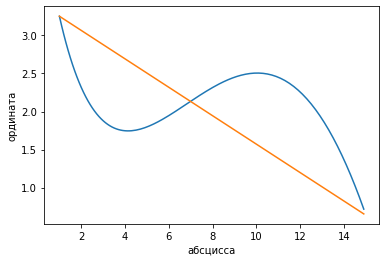

In [44]:
def d(x):
    return (w[0] + w[1] * x)

x = np.arange(1.0, 15.0, 0.1)
plt.plot(x, f(x))
plt.plot(x, d(x))
plt.xlabel('абсцисса')
plt.ylabel('ордината')
plt.show()

Как прекрасно видно на графике мы получили ровно то, что и писали. Теперь усложним задачу: построим аппроксимирующую функцию через три точки (1, 8 и 15).

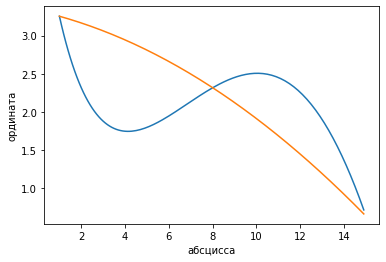

In [45]:
x1 = 1
x2 = 8
x3 = 15

a = np.array([[1, x1, x1 ** 2], [1, x2, x2 ** 2], [1, x3, x3 ** 2]])
b = np.array([f(x1), f(x2), f(x3)])
w = linalg.solve(a, b)

def d(x):
    return (w[0] + w[1] * x + w[2] * (x ** 2))

x = np.arange(1.0, 15.0, 0.1)
plt.plot(x, f(x))
plt.plot(x, d(x))
plt.xlabel('абсцисса')
plt.ylabel('ордината')
plt.show()

Наконец, построим аппроксимирующую функцию через четыре точки (1, 4, 10 и 15).

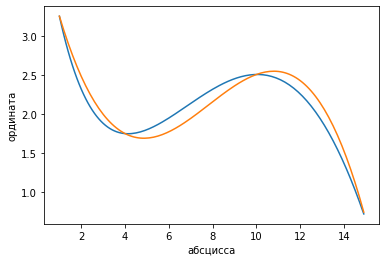

array([ 4.36264154, -1.29552587,  0.19333685, -0.00823565])

In [46]:
x1 = 1
x2 = 4
x3 = 10
x4 = 15

a = np.array([[1, x1, x1 ** 2, x1 ** 3], [1, x2, x2 ** 2, x2 ** 3], [1, x3, x3 ** 2, x3 ** 3], [1, x4, x4 ** 2, x4 ** 3]])
b = np.array([f(x1), f(x2), f(x3), f(x4)])
w = linalg.solve(a, b)

def d(x):
    return (w[0] + w[1] * x + w[2] * (x ** 2) + w[3] * (x ** 3))

x = np.arange(1.0, 15.0, 0.1)
plt.plot(x, f(x))
plt.plot(x, d(x))
plt.xlabel('абсцисса')
plt.ylabel('ордината')
plt.show()
w